# Descarga del dataset

A continuación se procede a descargar el dataset y la explicación de sus atributos. Puedes ver la desscripción de las variables en el siguiente enlace:




In [50]:
#añade las librerías básicas que consideres necesarias para el proyecto (pongo 3). Posteriormente podrás añadir más librerías.
import os
import numpy as np
import pandas as pd

## Carga del fichero en Python
df_train = pd.read_csv('Leads.csv', delimiter=',')

df_train.head()


,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


# Enunciado

*  Construir un modelo de aprendizaje automático que
permita predecir si un cliente potencial se convertirá
en cliente real.

* Se trata de un problema de clasificación binaria. La variable objetivo será la columna Converted, que
indicará con un 1 si el cliente se ha convertido en
cliente real, o con un 0 en caso contrario.

* Se recomienda realizar un análisis del dataset y un preprocesamiento de los datos antes de generar el modelo. Puedes utilizar el modelo que desees.

* Las operaciones sobre el dataset se deberán encuadrar en cada una de las secciones que se definen a continuación en el documento.

* El modelo se ha conseguido entrenar con dicho dataset logrando una precisión del ~90%.


# 1. Análisis del dataset

Antes de comenzar con el preprocesamiento de los datos necesitamos analizarlos y entender un poco el dataset. Utiliza las diferentes funciones y gráficos que hemos visto para hacerte una idea del dataset con el que estamos trabajando. Esta información guiará el preprocesamiento de los datos.

In [51]:
# Verificar la información básica del DataFrame
print(df_train.info())

# Verificar valores faltantes
print(df_train.isnull().sum())

# Estadísticas descriptivas
print(df_train.describe())

# Verificar la distribución de la variable objetivo 'Converted'
print(df_train['Converted'].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

# 2. Preprocesamiento del dataset


Dentro del preprocesamiento del dataset puedes utilizar diferentes técnicas como:**

*   Baleancear los datos
*   Eliminar columnas por los motivos que consideres (muchos valores nulos, no está correlacionado con la clase a predecir, ...)
*   Modificar columnas. Por ejemplo sutituir valores nulos por otros, clasificar una columna numérica en diferentes grupos (por ejemplo, cuartiles), ...
*   Crear nuevas columnas. Por ejemplo eliminando columnas categóricas, agregando un conjunto de columnas en otra, ...
*   Normalizar los datos
*   ...
*   

Al finalizar, deberás implementar un pipeline que paso a paso realice todo el preprocesamiento de los datos. De aquellos pasos que consideres necesarios, por ejemplo, el balanceamiento del dataset se deberá realizar fuera de un pipeline.


In [52]:
from sklearn.utils import resample

# Balanceo de datos con resample
# Dividir el dataframe en clases según la columna 'Converted'
df_class_0 = df_train[df_train.Converted == 0]
df_class_1 = df_train[df_train.Converted == 1]

# Determinar la clase con el mayor número de ocurrencias
max_size = max(len(df_class_0), len(df_class_1))

# Sobremuestrear las clases minoritarias para que todas tengan el mismo número de ocurrencias
df_class_0_upsampled = resample(df_class_0, n_samples=max_size, replace=True, random_state=42)
df_class_1_upsampled = resample(df_class_1, n_samples=max_size, replace=True, random_state=42)

# Combinar las clases balanceadas
df_balanced = pd.concat([df_class_0_upsampled, df_class_1_upsampled])

# Verificar el número de ocurrencias por clase en el dataset balanceado
print(f"Número de ocurrencias clase 0: {len(df_balanced[df_balanced.Converted == 0])}")
print(f"Número de ocurrencias clase 1: {len(df_balanced[df_balanced.Converted == 1])}")


Número de ocurrencias clase 0: 5679
Número de ocurrencias clase 1: 5679


In [53]:
from sklearn.base import BaseEstimator, TransformerMixin

# Eliminar columnas innecesarias
class EliminarColumnas(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X.drop(columns=self.columns, errors='ignore')


In [54]:
from sklearn.base import BaseEstimator, TransformerMixin

# transforma la columna categórica 'AsymmetriqueActivityIndex' en numérica
class AsymmetriqueActivityIndexTransformer(BaseEstimator, TransformerMixin):
    index_map = {'01.High': 3, '02.Medium': 2, '03.Low': 1}

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_transformed = X.copy()
        if 'Asymmetrique Activity Index' in X_transformed.columns:
            X_transformed['Asymmetrique Activity Index'] = X_transformed['Asymmetrique Activity Index'].map(self.index_map).fillna(0)
        return X_transformed


In [55]:
from sklearn.base import BaseEstimator, TransformerMixin

# Normalizador
class MiNormalizador(BaseEstimator, TransformerMixin):
    def __init__(self, columnas):
        # Recibimos una lista de columnas a normalizar
        self.columnas = columnas

    def fit(self, X, y=None):
        # Verificamos que todas las columnas existan en el DataFrame
        for columna in self.columnas:
            if columna not in X.columns:
                raise ValueError(f"La columna '{columna}' no existe en el DataFrame.")

        # Guardamos los valores mínimos y máximos de cada columna
        self.minimos = X[self.columnas].min()
        self.maximos = X[self.columnas].max()
        return self

    def transform(self, X):
        # Creamos una copia del DataFrame para no modificar el original
        X_copy = X.copy()

        # Normalizamos cada columna usando la fórmula de normalización
        for columna in self.columnas:
            X_copy[columna] = (X_copy[columna] - self.minimos[columna]) / (self.maximos[columna] - self.minimos[columna])

        return X_copy


In [56]:
from sklearn.pipeline import Pipeline

# Definir columnas a eliminar
columnas_a_eliminar = ['Prospect ID', 'Lead Number', 'Country', 'City']  # Ejemplo de columnas irrelevantes
columnas_a_normalizar = [
    'TotalVisits','Total Time Spent on Website','Page Views Per Visit','Asymmetrique Activity Score','Asymmetrique Profile Score']
# Añadimos el pipeline
pipeline = Pipeline(steps=[
    ('eliminar_columnas', EliminarColumnas(columns=columnas_a_eliminar)),
    ('asymmetrique_activity_index_transform', AsymmetriqueActivityIndexTransformer()),
    ('normalizador', MiNormalizador(columnas=columnas_a_normalizar))
])


In [57]:
# Aplicamos el pipeline al dataset
df_transformado = pipeline.fit_transform(df_train)

df_transformado


,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.000000,0.000000,0.000000,Page Visited on Website,Select,...,No,No,Select,2.0,02.Medium,0.727273,0.444444,No,No,Modified
1,API,Organic Search,No,No,0,0.019920,0.296655,0.045455,Email Opened,Select,...,No,No,Select,2.0,02.Medium,0.727273,0.444444,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,0.007968,0.674296,0.036364,Email Opened,Business Administration,...,No,No,Potential Lead,2.0,01.High,0.636364,1.000000,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,0.003984,0.134243,0.018182,Unreachable,Media and Advertising,...,No,No,Select,2.0,01.High,0.545455,0.666667,No,No,Modified
4,Landing Page Submission,Google,No,No,1,0.007968,0.628521,0.018182,Converted to Lead,Select,...,No,No,Select,2.0,01.High,0.727273,0.777778,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,Yes,No,1,0.031873,0.812060,0.048545,Email Marked Spam,IT Projects Management,...,No,No,Potential Lead,2.0,01.High,0.727273,0.666667,No,No,Email Marked Spam
9236,Landing Page Submission,Direct Traffic,No,No,0,0.007968,0.104754,0.036364,SMS Sent,Media and Advertising,...,No,No,Potential Lead,2.0,01.High,0.636364,0.888889,No,Yes,SMS Sent
9237,Landing Page Submission,Direct Traffic,Yes,No,0,0.007968,0.087588,0.036364,SMS Sent,Business Administration,...,No,No,Potential Lead,2.0,01.High,0.545455,1.000000,No,Yes,SMS Sent
9238,Landing Page Submission,Google,No,No,1,0.011952,0.219630,0.054545,SMS Sent,Human Resource Management,...,No,No,NaN,2.0,02.Medium,0.727273,0.555556,No,No,SMS Sent


# 3. Definición de modelos diferentes a redes neuronales

En este apartado podrás utilizar el algoritmo que consideres que ofrece mejores resultados para la generación del modelo. Para ello deberás realizar varios modelos y evaluarlos para quedarte con el que mejores resultados ofrezca.

In [58]:
from sklearn.model_selection import train_test_split

# Separar las características (X) y la variable objetivo (y)
X = df_transformado.drop('Converted', axis=1)  # 'Converted' es la variable objetivo
y = df_transformado['Converted']  # Variable objetivo

# Dividimos los datos en conjuntos de entrenamiento (95%) y prueba (5%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

# Verificamos los tamaños de los conjuntos
print("Tamaño de X_train:", X_train.shape)
print("Tamaño de y_train:", y_train.shape)
print("Tamaño de X_test:", X_test.shape)
print("Tamaño de y_test:", y_test.shape)


Tamaño de X_train: (8778, 32)
Tamaño de y_train: (8778,)
Tamaño de X_test: (462, 32)
Tamaño de y_test: (462,)


In [59]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer

# Definir columnas a eliminar
columnas_a_eliminar = ['Prospect ID', 'Lead Number', 'Country', 'City']  # Ejemplo de columnas irrelevantes
columnas_a_normalizar = [
    'TotalVisits','Total Time Spent on Website','Page Views Per Visit','Asymmetrique Activity Score','Asymmetrique Profile Score']

# Creamos el transformador
class Transformador1(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        # Convertir X a DataFrame si es un ndarray
        if isinstance(X, np.ndarray):
            X = pd.DataFrame(X)
        self.numeric_columns = list(X.dtypes[X.dtypes != 'object'].index)
        return self

    def transform(self, X):
        # Convertir X a DataFrame si es un ndarray
        if isinstance(X, np.ndarray):
            X = pd.DataFrame(X)
        return X[self.numeric_columns]


# pipeline con KNN
pipeline1 = Pipeline([
    ('transformador1', Transformador1()),
    ('eliminar_columnas', EliminarColumnas(columns=columnas_a_eliminar)),
    ('asymmetrique_activity_index_transform', AsymmetriqueActivityIndexTransformer()),
    ('normalizador', MiNormalizador(columnas=columnas_a_normalizar)),
    ('imputador', SimpleImputer(strategy='mean')), # transformador que se encarga de manejar los valores faltantes (NAN/null)
    ('scaler', StandardScaler()),  # Estandarización de los datos
    ('knn', KNeighborsClassifier(n_neighbors=3, weights='distance', algorithm='auto'))  # euclidean
])

# pipeline con SVM1
pipeline2 = Pipeline([
    ('transformador1', Transformador1()),
    ('eliminar_columnas', EliminarColumnas(columns=columnas_a_eliminar)),
    ('asymmetrique_activity_index_transform', AsymmetriqueActivityIndexTransformer()),
    ('normalizador', MiNormalizador(columnas=columnas_a_normalizar)),
    ('imputador', SimpleImputer(strategy='mean')), # transformador que se encarga de manejar los valores faltantes (NAN/null)
    ('scaler', StandardScaler()),  # Estandarización de los datos
    ('svm', SVC(C=1, kernel='linear', random_state=42))  # SVM con kernel lineal
])

# pipeline con SVM2
pipeline3 = Pipeline([
    ('transformador1', Transformador1()),
    ('eliminar_columnas', EliminarColumnas(columns=columnas_a_eliminar)),
    ('asymmetrique_activity_index_transform', AsymmetriqueActivityIndexTransformer()),
    ('normalizador', MiNormalizador(columnas=columnas_a_normalizar)),
    ('imputador', SimpleImputer(strategy='mean')), # transformador que se encarga de manejar los valores faltantes (NAN/null)
    ('scaler', StandardScaler()),  # Estandarización de los datos
    ('svm', SVC(C=1, kernel='rbf', random_state=42))  # SVM con kernel rbf
])

# pipeline con SVM3
pipeline4 = Pipeline([
    ('transformador1', Transformador1()),
    ('eliminar_columnas', EliminarColumnas(columns=columnas_a_eliminar)),
    ('asymmetrique_activity_index_transform', AsymmetriqueActivityIndexTransformer()),
    ('normalizador', MiNormalizador(columnas=columnas_a_normalizar)),
    ('imputador', SimpleImputer(strategy='mean')), # transformador que se encarga de manejar los valores faltantes (NAN/null)
    ('scaler', StandardScaler()),  # Estandarización de los datos
    ('svm', SVC(C=0.1, kernel='linear', random_state=42))  # SVM con kernel lineal
])

# pipeline con Árboles de Decisión
pipeline5 = Pipeline([
    ('transformador1', Transformador1()),
    ('eliminar_columnas', EliminarColumnas(columns=columnas_a_eliminar)),
    ('asymmetrique_activity_index_transform', AsymmetriqueActivityIndexTransformer()),
    ('normalizador', MiNormalizador(columnas=columnas_a_normalizar)),
    ('imputador', SimpleImputer(strategy='mean')), # transformador que se encarga de manejar los valores faltantes (NAN/null)
    ('scaler', StandardScaler()),  # Estandarización de los datos
    ('decisiontree', DecisionTreeClassifier(max_depth=3, random_state=42))  # Árbol de Decisión
])


In [60]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Configurar la validación cruzada con StratifiedKFold
k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluar el pipeline con validación cruzada | KNN
scores_knn1 = cross_val_score(pipeline1, X_train, y_train, cv=k_fold, scoring='accuracy')
# Evaluar el pipeline con validación cruzada | svm
scores_svm1 = cross_val_score(pipeline2, X_train, y_train, cv=k_fold, scoring='accuracy')
# Evaluar el pipeline con validación cruzada | svm
scores_svm2 = cross_val_score(pipeline3, X_train, y_train, cv=k_fold, scoring='accuracy')
# Evaluar el pipeline con validación cruzada | svm
scores_svm3 = cross_val_score(pipeline4, X_train, y_train, cv=k_fold, scoring='accuracy')
# Evaluar el pipeline con validación cruzada | decisiontree
scores_dt = cross_val_score(pipeline5, X_train, y_train, cv=k_fold, scoring='accuracy')


# Imprimir la precisión media en la validación cruzada
print("Precisión media con KNN:", scores_knn1.mean())
# Imprimir la precisión media en la validación cruzada
print("Precisión media con SVM - 1:", scores_svm1.mean())
# Imprimir la precisión media en la validación cruzada
print("Precisión media con SVM - 2:", scores_svm2.mean())
# Imprimir la precisión media en la validación cruzada
print("Precisión media con SVM - 3:", scores_svm3.mean())
# Imprimir la precisión media en la validación cruzada
print("Precisión media con DT:", scores_dt.mean())


Precisión media con KNN: 0.7031239738073451
Precisión media con SVM - 1: 0.7252236045402333
Precisión media con SVM - 2: 0.7583737969614963
Precisión media con SVM - 3: 0.725451394973035
Precisión media con DT: 0.7426523632446185


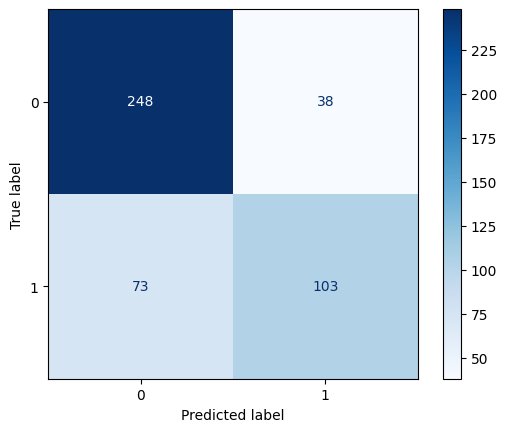

In [61]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

best_pipeline = pipeline3
# Entrenar el modelo con los datos de entrenamiento
best_pipeline.fit(X_train, y_train)

# Predecir las etiquetas para el conjunto de validación
y_pred = best_pipeline.predict(X_test)

# Generar la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Mostrar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_pipeline.classes_)
disp.plot(cmap='Blues')


# 4. Definición de modelo basado en red neuronal

En este apartado deberás entrenar una red neuronal ajustando la arquitectura y el entrenamiento a los mejores resultados de evaluación.

In [62]:
import numpy as np
from keras.models import Sequential
# from keras.layers.core import Dense
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Convertimos solo las columnas categóricas
for col in X_train.select_dtypes(include=['object']).columns:
    X_train[col] = label_encoder.fit_transform(X_train[col])

model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(32,)))  # Capa de entrada con 16 neuronas input_shape = columnas
model.add(Dense(1, activation='sigmoid'))  # Capa de salida para clasificación binaria
model.compile(optimizer=Adam(), loss='mean_squared_error', metrics=['binary_accuracy'])  # Compilamos el modelo

# Entrenar el modelo en los datos de entrenamiento
model.fit(X_train, y_train, epochs=20)

# evaluamos el modelo
scores = model.evaluate(X_train, y_train)

print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print (model.predict(X_train).round())

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


275/275 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - binary_accuracy: 0.6036 - loss: nan
Epoch 2/20
275/275 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - binary_accuracy: 0.6067 - loss: nan
Epoch 3/20
275/275 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.6107 - loss: nan
Epoch 4/20
275/275 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - binary_accuracy: 0.6112 - loss: nan
Epoch 5/20
275/275 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - binary_accuracy: 0.6179 - loss: nan
Epoch 6/20
275/275 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.6206 - loss: nan
Epoch 7/20
275/275 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - binary_accuracy: 0.6202 - loss: nan
Epoch 8/20
275/275 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - binary_accuracy: 0.6094 - loss: nan
Epoch 9/20
275/275 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - binary_accuracy: 0.6225 - loss: nan
Epoch 10/20
275/275 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - binary_accuracy: 0.6178 - loss: nan
Epoch 11/20
275/275 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - binary_accuracy: 0.6221 - loss: nan
Epoch 12/20
275/275

In [63]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Cargar datos
data = load_iris()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear el pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Escalador para normalizar los datos
    ('mlp', MLPClassifier(max_iter=10000, random_state=42))  # Modelo
])

# Entrenar el modelo con el pipeline
pipeline.fit(X_train, y_train)

# Evaluación
accuracy = pipeline.score(X_test, y_test)
print(f"Precisión: {accuracy:.2f}")

Precisión: 1.00


# 5. Conclusiones

Se deberá realizar una explicación final del preprocesamiento de datos realizado, junto con el modelo que mejores resultados ha dado y cómo se ha evaluado dicho modelo.

In [64]:
'''
Este modelo usa una red neuronal con 16 neuronas en la capa oculta,
un preprocesamiento usando LabelEncoder para manejar datos categóricos y se evaluó con binary_accuracy
'''

' \nEste modelo usa una red neuronal con 16 neuronas en la capa oculta, \nun preprocesamiento usando LabelEncoder para manejar datos categóricos y se evaluó con binary_accuracy\n'